# HW 2 - Starter Code

First, be sure the sqlite file (found here: https://github.com/jknecht/baseball-archive-sqlite/raw/master/lahman2014.sqlite) is in the same folder as your code. 

The database contains many tables / relations, but we will be mainly using 2 relations: Salaries and Teams. The schema (description of the fields in the tables) are given below. Not all columns/fields are relevant for this homework, and we will pointout relevant fields as we walk through the assignement. 

Salaries table
---------------
- yearID         Year
- teamID         Team
- lgID           League
- playerID       Player ID code
- salary         Salary


Teams Table
-----------
- yearID         Year
- lgID           League
- teamID         Team
- franchID       Franchise (links to TeamsFranchise table)
- divID          Team's division
- Rank           Position in final standings
- G              Games played
- GHome          Games played at home
- W              Wins
- L              Losses
- DivWin         Division Winner (Y or N)
- WCWin          Wild Card Winner (Y or N)
- LgWin          League Champion(Y or N)
- WSWin          World Series Winner (Y or N)
- R              Runs scored
- AB             At bats
- H              Hits by batters
- 2B             Doubles
- 3B             Triples
- HR             Homeruns by batters
- BB             Walks by batters
- SO             Strikeouts by batters
- SB             Stolen bases
- CS             Caught stealing
- HBP            Batters hit by pitch
- SF             Sacrifice flies
- RA             Opponents runs scored
- ER             Earned runs allowed
- ERA            Earned run average
- CG             Complete games
- SHO            Shutouts
- SV             Saves
- IPOuts         Outs Pitched (innings pitched x 3)
- HA             Hits allowed
- HRA            Homeruns allowed
- BBA            Walks allowed
- SOA            Strikeouts by pitchers
- E              Errors
- DP             Double Plays
- FP             Fielding  percentage
- name           Team's full name
- park           Name of team's home ballpark
- attendance     Home attendance total
- BPF            Three-year park factor for batters
- PPF            Three-year park factor for pitchers
- teamIDBR       Team ID used by Baseball Reference website
- teamIDlahman45 Team ID used in Lahman database version 4.5
- teamIDretro    Team ID used by Retrosheet

In [21]:
import sqlite3
import pandas

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)  # connect to database and ingest the tables 

# lets run a query to look at the data
salary_query = "SELECT yearID, sum(salary) as total_payroll FROM Salaries WHERE lgID == 'AL' GROUP BY yearID"

team_salaries = pandas.read_sql(salary_query, conn)
team_salaries.head()

,yearID,total_payroll
0,1985,134401120.0
1,1986,157716444.0
2,1987,136088747.0
3,1988,157049812.0
4,1989,188771688.0


## Analysis

We want to understand how efficient teams have been historically at spending money and getting wins in return. In the case of Moneyball, one would expect that Oakland was not much more efficient than other teams in their spending before 2000, were much more efficient (they made a movie about it after all) between 2000 and 2005, and by then other teams may have caught up. Lets see how this is reflected in the data we have.

### Relation Creation

Using SQL compute a new relation that contains a subset of fields of interest to help us compute further statisitcs of interest.  We neeed to think about the type of join used as it determines how missing data is handled. In the code below, a SQL statment is executed to create the new relation jusing a join between the two tables; 




In [22]:
createTable_query = "CREATE TABLE statsTbl AS SELECT \
Salaries.yearID, Teams.teamID, Teams.name, Salaries.salary, Teams.G, Teams.W, Teams.L \
FROM Salaries  \
JOIN Teams \
ON Salaries.yearID=Teams.yearID AND Salaries.teamID=Teams.teamID \
WHERE Salaries.lgID=='AL' ;"

cursor = conn.cursor()
cursor.execute(createTable_query)
conn.commit()

# if you run this mulitple times, you may see an error stating "statsTbl already exists". This error message can be ignored. 

OperationalError: table statsTbl already exists

In [23]:
query = "select * from statsTbl;"

result = pandas.read_sql(query, conn)
result.head()


# As you can see, it generates a new table/relation which contains 7 fields:
# yearID
# teamID
# name
# salary
# G --> denotes the number of games
# W --> denotes the number of wins
# L --> denotes the number of losses

,yearID,teamID,name,salary,G,W,L
0,1985,BAL,Baltimore Orioles,625000.0,161,83,78
1,1985,BAL,Baltimore Orioles,480000.0,161,83,78
2,1985,BAL,Baltimore Orioles,437500.0,161,83,78
3,1985,BAL,Baltimore Orioles,512500.0,161,83,78
4,1985,BAL,Baltimore Orioles,375000.0,161,83,78


Suppose we want to print the rows / entries for Oakland between 1988 - 1989. Hint: need to use a WHERE clause in the SQL query to filter out rows only for teamID="OAK"

In [24]:
query = "SELECT * FROM statsTbl WHERE teamID='OAK' AND yearID>=1988 AND yearID<=1989;"

result = pandas.read_sql(query, conn)
result.head()

,yearID,teamID,name,salary,G,W,L
0,1988,OAK,Oakland Athletics,495000.0,162,104,58
1,1988,OAK,Oakland Athletics,325000.0,162,104,58
2,1988,OAK,Oakland Athletics,550000.0,162,104,58
3,1988,OAK,Oakland Athletics,650000.0,162,104,58
4,1988,OAK,Oakland Athletics,100000.0,162,104,58


Suppose we want to print the year for which Oakland had the largest number of wins. Lets write that SQL query. 

In [25]:
query = "SELECT yearID, max(W) from statsTbl WHERE teamID='OAK';"

result = pandas.read_sql(query, conn)
result.head()

,yearID,max(W)
0,1988,104


Suppose we want to compute the total payroll for teamID='OAK' for the yearID='1988'. To do this, we must sum-up all the salaries for a given team for a given year. 

In [43]:
query = "SELECT teamID, yearID, SUM(salary) AS TotalSalary  \
FROM statsTbl  \
WHERE yearID='1988' AND teamID='OAK' \
GROUP BY teamID,yearID;"

result = pandas.read_sql(query, conn)
result.head()


,teamID,yearID,TotalSalary
0,OAK,1988,9690000.0


## Problem 1 

Using SQL, compute the result containing the total payroll and winning percentage (number of wins / number of games * 100) for each team (that is, for each teamID and yearID combination). 

Hint: Be sure to perform a groupby on the fields teamID and yearID



In [48]:

query = "SELECT teamID, yearID, SUM(salary) AS Total, CAST(W AS Float)/CAST(G AS Float)*100  AS WinningPercentage  FROM statsTbl  GROUP BY teamID,yearID;"

result = pandas.read_sql(query, conn)
result.head()

,teamID,yearID,Total,WinningPercentage
0,ANA,1997,31135472.0,51.851852
1,ANA,1998,41281000.0,52.469136
2,ANA,1999,55388166.0,43.209877
3,ANA,2000,51464167.0,50.617284
4,ANA,2001,47535167.0,46.296296


## Problem 2

Write code to printout the teamID that had the highest WinningPercentage over total sepending (salaries). 

## Problem 3

Write code to produce plots that illustrate the team's total spending (salaries) conditioned on time (from 1990-2014), specifically for teamID='OAK'.

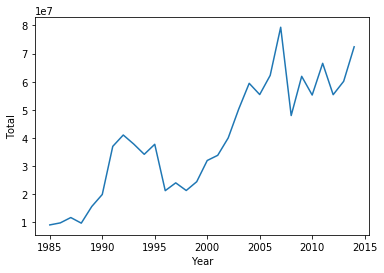

In [57]:
import matplotlib.pyplot as plt

query = "SELECT teamID, yearID, SUM(salary) AS Total \
FROM statsTbl  \
WHERE teamID='OAK' \
GROUP BY teamID , yearID;"

result2 = pandas.read_sql(query, conn)
result2.head()

plt.plot(result2["yearID"],result2["Total"])
plt.ylabel('Total')
plt.xlabel('Year')
plt.show()

## Problem 4

Write code to discretize year into five time periods (you can use pandas.cut to accomplish this) and then make a scatterplot showing mean winning percentage (y-axis) vs. mean payroll (x-axis) for each of the five time periods.

What can you say about team payrolls across these periods? Are there any teams that standout as being particularly good at paying for wins across these time periods? What can you say about the Oakland A’s spending efficiency across these time periods (labeling points in the scatterplot can help interpretation).

In [65]:
# Example - using Pandas Cut

# we will use the query result2 from previous step, which contains the fields: teamID, yearID, Total

print result2["Total"]  # orginial data (total spending - salaries)

# pandas.cut allows us to convert from continuous variable to a categorical variable.
# the statement below converts the total spending to one of three catagories 
pandas.cut(result2["Total"],3, labels=["low","med","high"], retbins=True)  


0      9058606.0
1      9779421.0
2     11680839.0
3      9690000.0
4     15613070.0
5     19887501.0
6     36999167.0
7     41035000.0
8     37812333.0
9     34172500.0
10    37739225.0
11    21243000.0
12    24018500.0
13    21303000.0
14    24431833.0
15    31971333.0
16    33810750.0
17    40004167.0
18    50260834.0
19    59425667.0
20    55425762.0
21    62243079.0
22    79366940.0
23    47967126.0
24    61910000.0
25    55254900.0
26    66536500.0
27    55372500.0
28    60132500.0
29    72408400.0
Name: Total, dtype: float64


(0      low
 1      low
 2      low
 3      low
 4      low
 5      low
 6      med
 7      med
 8      med
 9      med
 10     med
 11     low
 12     low
 13     low
 14     low
 15     low
 16     med
 17     med
 18     med
 19    high
 20     med
 21    high
 22    high
 23     med
 24    high
 25     med
 26    high
 27     med
 28    high
 29    high
 Name: Total, dtype: category
 Categories (3, object): [low < med < high],
 array([  8988297.666     ,  32494717.33333333,  55930828.66666666,
         79366940.        ]))